660710701 ชนม์นิภา คำนูณวัฒน์

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install prophet

In [3]:
from prophet import Prophet

In [4]:
#อ่านข้อมูลcafethai_prices.csv แล้วแสดงส่วนหัวมา
df = pd.read_csv("cafethai_prices.csv")
df.head()

,date,time,cash_type,coffee_name,money
0,1/3/2023,08:04:19,card,Latte,75
1,1/3/2023,08:08:54,cash,Americano with Milk,70
2,1/3/2023,08:09:03,card,Cappuccino,75
3,1/3/2023,08:10:26,cash,Cappuccino,75
4,1/3/2023,08:15:37,cash,Cappuccino,75


In [5]:
#ทำแยกตามชนิดกาแฟ

#รวม date+time
df['datetime'] = pd.to_datetime(df['date'].astype(str) + " " + df['time'].astype(str), dayfirst=True)

#สร้างcolumn date เฉพาะวัน(ตัดเวลาออก)
df['date'] = df['datetime'].dt.date

#นับจำนวนแก้วที่ขายต่อวันต่อ coffee_name
daily_sales = df.groupby(['date','coffee_name']).size().reset_index(name='cups_sold')

#แสดง10อันแรก
print(daily_sales.head(10))

         date          coffee_name  cups_sold
0  2023-03-01            Americano         19
1  2023-03-01  Americano with Milk         27
2  2023-03-01           Cappuccino         24
3  2023-03-01                Cocoa          7
4  2023-03-01              Cortado         14
5  2023-03-01             Espresso          6
6  2023-03-01        Hot Chocolate          4
7  2023-03-01                Latte         24
8  2023-03-02            Americano         19
9  2023-03-02  Americano with Milk         26


DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/wbeow352.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/pza1bs64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99887', 'data', 'file=/tmp/tmpdq0xg7m0/wbeow352.json', 'init=/tmp/tmpdq0xg7m0/pza1bs64.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_modelxm24vymw/prophet_model-20250917131545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


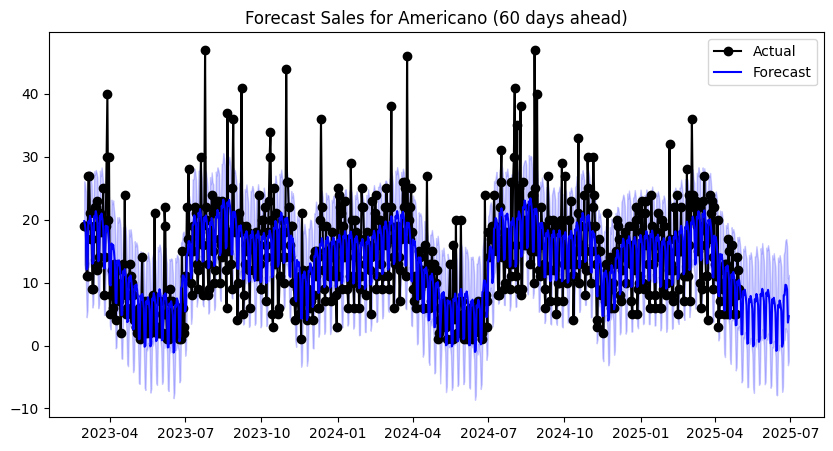

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/bwv_k54_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/hq_wltzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92588', 'data', 'file=/tmp/tmpdq0xg7m0/bwv_k54_.json', 'init=/tmp/tmpdq0xg7m0/hq_wltzu.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_modelao3sij8s/prophet_model-20250917131546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


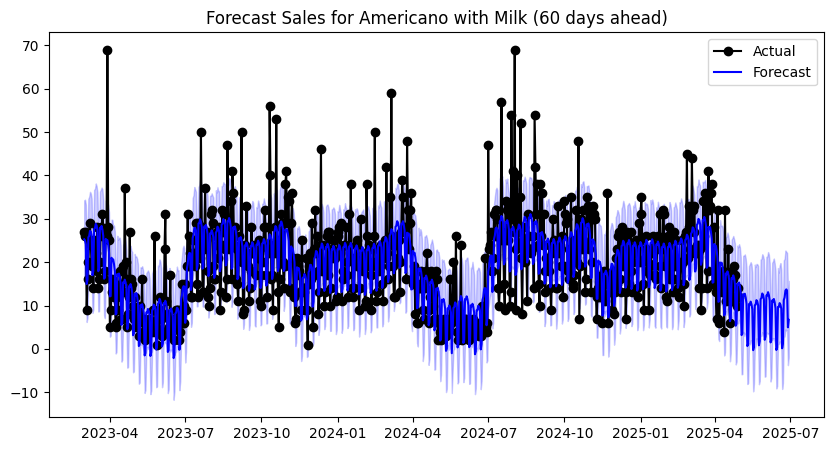

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/nzzc018o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/jubjhjlv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24537', 'data', 'file=/tmp/tmpdq0xg7m0/nzzc018o.json', 'init=/tmp/tmpdq0xg7m0/jubjhjlv.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_modelfjkzwduc/prophet_model-20250917131546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


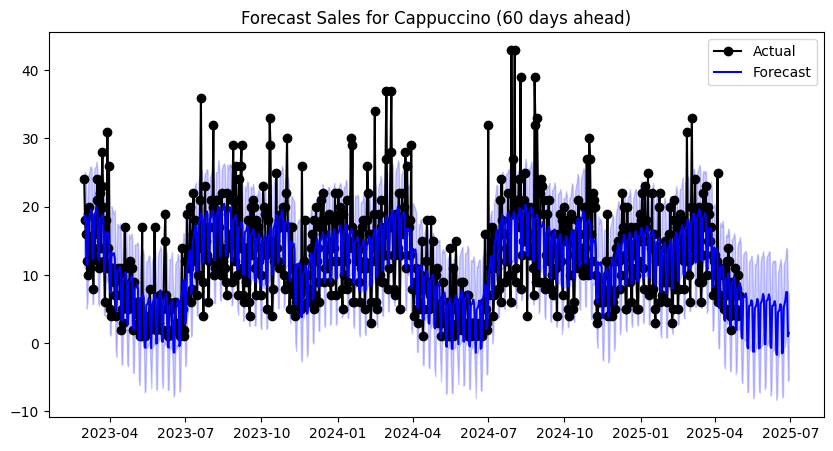

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/7os4p66r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/hw5hb78a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82988', 'data', 'file=/tmp/tmpdq0xg7m0/7os4p66r.json', 'init=/tmp/tmpdq0xg7m0/hw5hb78a.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_modelmdrc4smn/prophet_model-20250917131547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


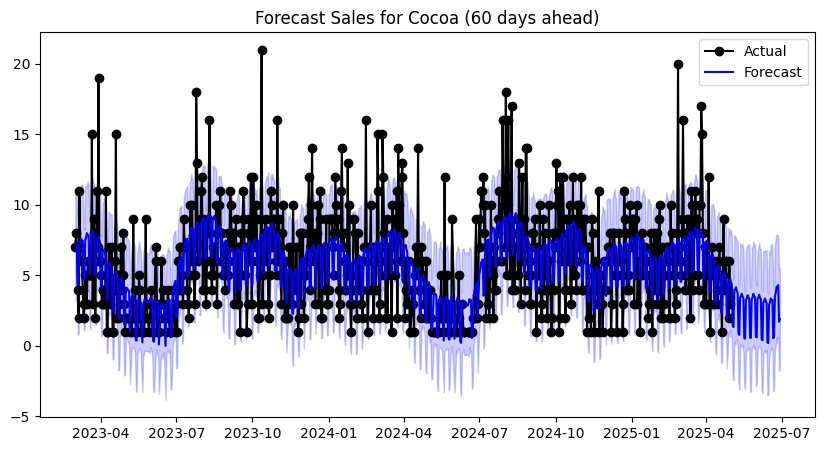

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/375s2s6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/n7wx9jau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83466', 'data', 'file=/tmp/tmpdq0xg7m0/375s2s6t.json', 'init=/tmp/tmpdq0xg7m0/n7wx9jau.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_model7ruvd5er/prophet_model-20250917131548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


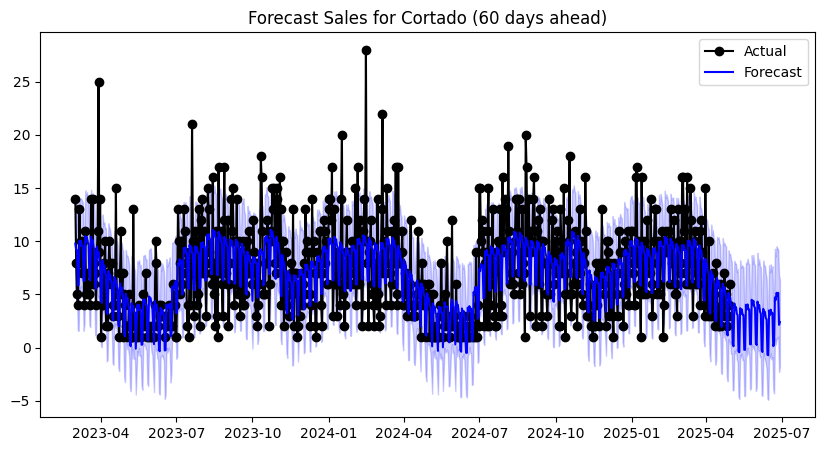

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/0chzi9fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/dhgydc7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64388', 'data', 'file=/tmp/tmpdq0xg7m0/0chzi9fe.json', 'init=/tmp/tmpdq0xg7m0/dhgydc7f.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_model8n19mwhw/prophet_model-20250917131548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


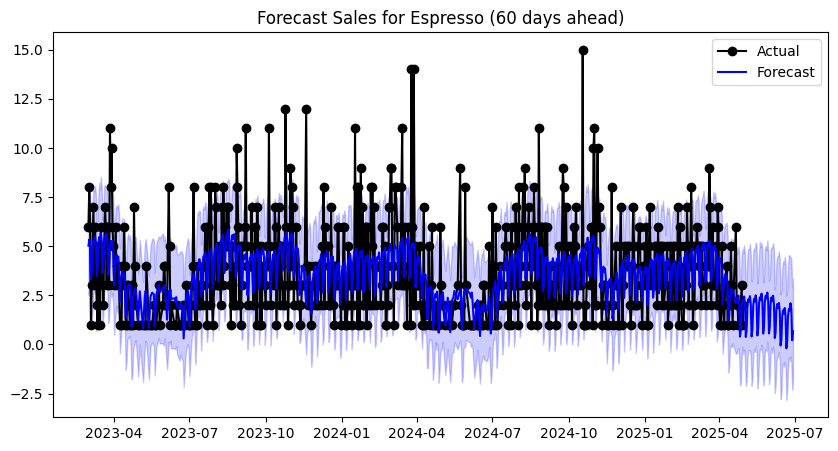

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/1u4jtlu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/ht0g0vl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50666', 'data', 'file=/tmp/tmpdq0xg7m0/1u4jtlu0.json', 'init=/tmp/tmpdq0xg7m0/ht0g0vl8.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_modelt4u2tl2z/prophet_model-20250917131550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


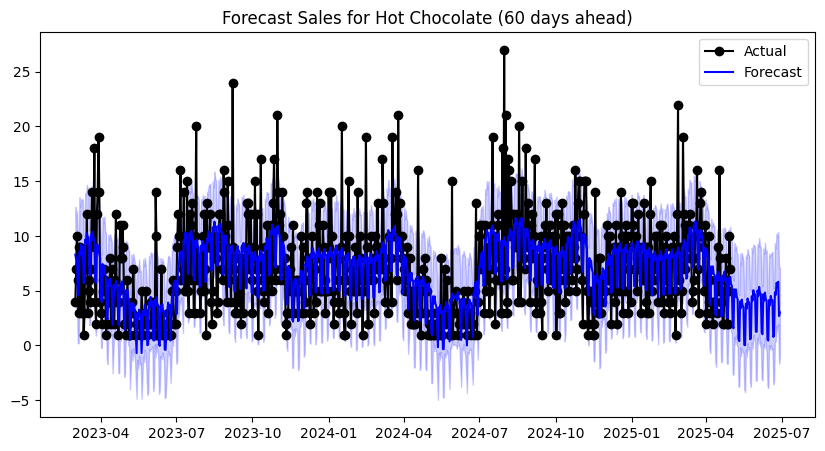

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/ecj8ly2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdq0xg7m0/bo88j5o4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68019', 'data', 'file=/tmp/tmpdq0xg7m0/ecj8ly2s.json', 'init=/tmp/tmpdq0xg7m0/bo88j5o4.json', 'output', 'file=/tmp/tmpdq0xg7m0/prophet_modelg6pjpo2e/prophet_model-20250917131552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


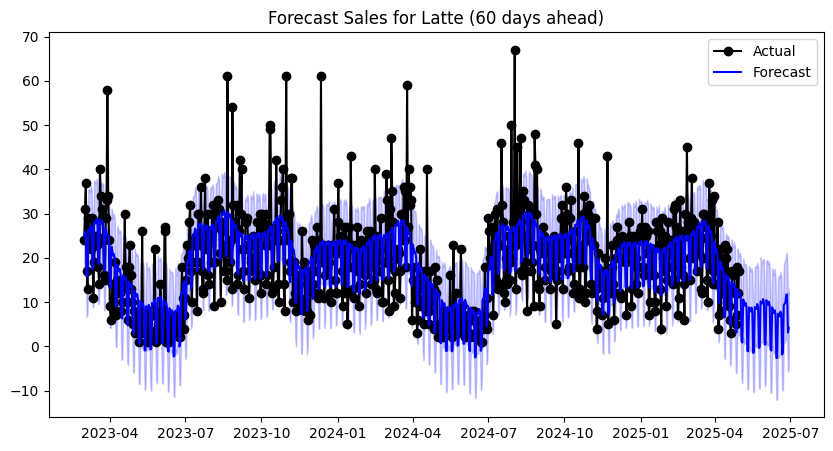

In [6]:
predictions = {}

for coffee in daily_sales['coffee_name'].unique():
    #เลือกเฉพาะกาแฟชนิดนั้น
    ts = daily_sales[daily_sales['coffee_name'] == coffee][['date','cups_sold']]

    # Prophet(ทำนายล่วงหน้า) ต้องการcolumn ds = วันที่, y = ค่าที่จะทำนาย
    ts = ts.rename(columns={'date':'ds','cups_sold':'y'})

    #สร้างและtrain model
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model.fit(ts)

    #ทำนาย 60 วันข้างหน้า
    future = model.make_future_dataframe(periods=60)

    #พยากรณ์
    forecast = model.predict(future)

    #เก็บผลลัพธ์ไว้
    predictions[coffee] = forecast

    #เก็บผลลัพธ์ไว้
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(ts['ds'], ts['y'], 'ko-', label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
    ax.set_title(f"Forecast Sales for {coffee} (60 days ahead)")
    ax.legend()

    #แสดงกราฟผลลัพธ์
    plt.show()


In [7]:
all_forecasts = []

for coffee, fc in predictions.items():
    #cutoff=วันล่าสุดในข้อมูลจริง
    cutoff = daily_sales['date'].max()

    #เลือกเฉพาะวันที่ > cutoff(60 วันในอนาคต)
    sub = fc[fc['ds'] > pd.to_datetime(cutoff)][['ds','yhat','yhat_lower','yhat_upper']].copy()
    sub['coffee_name'] = coffee
    all_forecasts.append(sub)

#การรวมDataFrame หลายๆตัวเข้าด้วยกันเป็นอันเดียว
forecast_60days = pd.concat(all_forecasts)

print(forecast_60days.head(20))


            ds      yhat  yhat_lower  yhat_upper coffee_name
790 2025-05-01  9.506918    2.249395   16.187775   Americano
791 2025-05-02  7.936232    1.349694   14.655525   Americano
792 2025-05-03  1.759430   -5.856599    8.447201   Americano
793 2025-05-04  1.788706   -5.516727    8.729123   Americano
794 2025-05-05  8.662543    1.300641   15.384121   Americano
795 2025-05-06  7.997170    1.021799   15.001513   Americano
796 2025-05-07  8.854686    2.099882   15.849508   Americano
797 2025-05-08  7.932463    1.306260   14.504281   Americano
798 2025-05-09  6.401866   -0.708996   13.853289   Americano
799 2025-05-10  0.289961   -6.624434    7.615990   Americano
800 2025-05-11  0.408913   -6.593773    7.741154   Americano
801 2025-05-12  7.396318    0.472695   14.410553   Americano
802 2025-05-13  6.866670    0.250006   13.807472   Americano
803 2025-05-14  7.879522    1.213188   14.819838   Americano
804 2025-05-15  7.128958    0.078294   14.075124   Americano
805 2025-05-16  5.782391